In [36]:
import csv 
import matplotlib.pyplot as plt
import numpy as np 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense,Dropout,LSTM,Bidirectional,Flatten,Embedding,Activation
import nltk
from nltk.corpus import stopwords
import re
import tensorflow as tf

In [12]:
vocab_sz = 5000
max_length = 200
oov = '<OOV>'
training_ratio = 0.8

In [5]:
sw = stopwords.words("english")
sw[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [9]:
with open("bbc-text.csv",'r') as f:
    rows = csv.reader(f,delimiter=',')
    next(rows)
    labels = []
    articles = []
    for row in rows:
        labels.append(row[0])
        article = row[1].lower()
        for w in sw:
            article = article.replace(' ' + w + ' ',' ')
            article = re.sub('\s+',' ',article)
        articles.append(article)

In [10]:
labels[:10]

['tech',
 'business',
 'sport',
 'sport',
 'entertainment',
 'politics',
 'politics',
 'sport',
 'sport',
 'entertainment']

In [11]:
articles[0]

'tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies impact one favourite pastimes. us leading trend programmes content delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us tivo uk sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take europe lack high-definition programming. people forward wind adverts also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms a

In [13]:
training_articles = articles[:int(training_ratio * len(articles))]
val_articles = articles[int(training_ratio * len(articles)):]
training_labels = labels[:int(training_ratio * len(articles))]
val_labels = labels[int(training_ratio * len(articles)):]

In [14]:
print("Training articles:",len(training_articles))
print("Training labels:",len(training_labels))
print("Validation articles:",len(val_articles))
print("Validation_labels:",len(val_labels))

Training articles: 1780
Training labels: 1780
Validation articles: 445
Validation_labels: 445


In [15]:
tok = Tokenizer(num_words=vocab_sz,oov_token=oov)
tok.fit_on_texts(training_articles)
word_idx = tok.word_index

In [23]:
i = 1
k = list(word_idx.keys())
while True:
    print(k[i-1],":",i)
    i += 1
    if i == 100:
        break

<OOV> : 1
said : 2
mr : 3
would : 4
year : 5
also : 6
people : 7
new : 8
us : 9
one : 10
could : 11
last : 12
first : 13
time : 14
two : 15
government : 16
world : 17
uk : 18
best : 19
years : 20
make : 21
film : 22
told : 23
made : 24
get : 25
music : 26
game : 27
like : 28
back : 29
many : 30
000 : 31
labour : 32
three : 33
well : 34
1 : 35
next : 36
bbc : 37
take : 38
set : 39
number : 40
added : 41
way : 42
market : 43
2 : 44
company : 45
may : 46
says : 47
election : 48
home : 49
party : 50
good : 51
going : 52
much : 53
work : 54
2004 : 55
still : 56
win : 57
show : 58
think : 59
games : 60
go : 61
top : 62
second : 63
million : 64
6 : 65
england : 66
firm : 67
since : 68
week : 69
say : 70
play : 71
part : 72
public : 73
use : 74
blair : 75
3 : 76
want : 77
minister : 78
however : 79
10 : 80
country : 81
technology : 82
see : 83
4 : 84
five : 85
british : 86
news : 87
european : 88
high : 89
group : 90
tv : 91
used : 92
end : 93
expected : 94
even : 95
players : 96
brown : 97
5 

In [24]:
training_seq = tok.texts_to_sequences(training_articles)
val_seq = tok.texts_to_sequences(val_articles)

In [26]:
len(training_seq[0]),len(val_seq[0])

(426, 156)

In [27]:
training_pad = pad_sequences(training_seq,maxlen=max_length)
val_pad = pad_sequences(val_seq,maxlen=max_length)

In [29]:
len(training_pad[0]),len(val_pad[0])

(200, 200)

In [30]:
lb_tok = Tokenizer()
lb_tok.fit_on_texts(training_labels)
training_labels_seq = lb_tok.texts_to_sequences(training_labels)
val_labels_seq = lb_tok.texts_to_sequences(val_labels)

In [43]:
model = Sequential()
model.add(Embedding(input_dim=vocab_sz,output_dim=64))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dense(6,activation='softmax'))

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          320000    
                                                                 
 dropout_2 (Dropout)         (None, None, 64)          0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 774       
                                                                 
Total params: 386,822
Trainable params: 386,822
Non-trainable params: 0
_________________________________________________________________


In [45]:
opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(loss='sparse_categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [39]:
training_pad

array([[  53,  548,  400, ...,  893,   77,   77],
       [   0,    0,    0, ..., 4728, 2358,    1],
       [   0,    0,    0, ..., 1091,   24, 1823],
       ...,
       [1804, 4193,  115, ...,  235, 1681,  806],
       [1884,  645,  287, ..., 1059, 1335,   88],
       [   0,    0,    0, ..., 4069, 1461,  330]])

In [41]:
training_labels_seq = np.array(training_labels_seq)

In [47]:
val_labels_seq = np.array(val_labels_seq)

In [48]:
n_epochs = 30
history = model.fit(training_pad, training_labels_seq,validation_data=(val_pad,val_labels_seq) ,epochs=n_epochs)

Epoch 1/30
56/56 [==============================] - 23s 420ms/step - loss: 1.1954 - accuracy: 0.5736 - val_loss: 1.0491 - val_accuracy: 0.4719
Epoch 2/30
56/56 [==============================] - 22s 395ms/step - loss: 0.8440 - accuracy: 0.6876 - val_loss: 0.7166 - val_accuracy: 0.7461
Epoch 3/30
56/56 [==============================] - 20s 349ms/step - loss: 0.5417 - accuracy: 0.8691 - val_loss: 0.5941 - val_accuracy: 0.8067
Epoch 4/30
56/56 [==============================] - 19s 339ms/step - loss: 0.7368 - accuracy: 0.7326 - val_loss: 1.1445 - val_accuracy: 0.5124
Epoch 5/30
56/56 [==============================] - 19s 337ms/step - loss: 0.9680 - accuracy: 0.6792 - val_loss: 1.3231 - val_accuracy: 0.5865
Epoch 6/30
56/56 [==============================] - 19s 340ms/step - loss: 0.5965 - accuracy: 0.8039 - val_loss: 0.4559 - val_accuracy: 0.8449
Epoch 7/30
56/56 [==============================] - 19s 336ms/step - loss: 0.2730 - accuracy: 0.9090 - val_loss: 0.3895 - val_accuracy: 0.8742

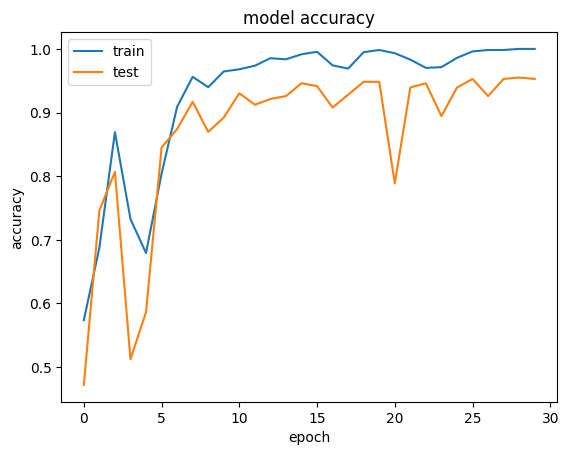

In [49]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

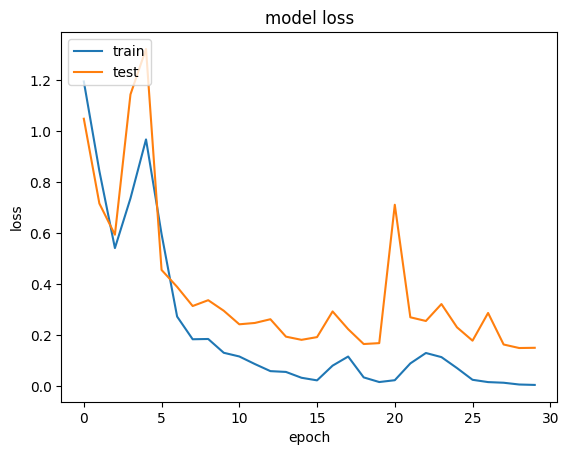

In [50]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [52]:
txt = ["blair prepares to name poll date tony blair is likely to name 5 may as election day when parliament returns from its easter break  the bbc s political editor has learned.  andrew marr says mr blair will ask the queen on 4 or 5 april to dissolve parliament at the end of that week. mr blair has so far resisted calls for him to name the day but all parties have stepped up campaigning recently. downing street would not be drawn on the claim  saying election timing was a matter for the prime minister.  a number 10 spokeswoman would only say:  he will announce an election when he wants to announce an election.  the move will signal a frantic week at westminster as the government is likely to try to get key legislation through parliament. the government needs its finance bill  covering the budget plans  to be passed before the commons closes for business at the end of the session on 7 april.  but it will also seek to push through its serious and organised crime bill and id cards bill. mr marr said on wednesday s today programme:  there s almost nobody at a senior level inside the government or in parliament itself who doesn t expect the election to be called on 4 or 5 april.  as soon as the commons is back after the short easter recess  tony blair whips up to the palace  asks the queen to dissolve parliament ... and we re going.  the labour government officially has until june 2006 to hold general election  but in recent years governments have favoured four-year terms."]

seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment'] 

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

1/1 [==============================] - 2s 2s/step
[[4.4207249e-05 2.5501431e-04 8.6085807e-04 9.9454850e-01 2.8510843e-03
  1.4402347e-03]]
3
politics


In [53]:
txt = ["call to save manufacturing jobs the trades union congress (tuc) is calling on the government to stem job losses in manufacturing firms by reviewing the help it gives companies.  the tuc said in its submission before the budget that action is needed because of 105 000 jobs lost from the sector over the last year. it calls for better pensions  child care provision and decent wages. the 36-page submission also urges the government to examine support other european countries provide to industry. tuc general secretary brendan barber called for  a commitment to policies that will make a real difference to the lives of working people.    greater investment in childcare strategies and the people delivering that childcare will increases the options available to working parents   he said.  a commitment to our public services and manufacturing sector ensures that we can continue to compete on a global level and deliver the frontline services that this country needs.  he also called for  practical measures  to help pensioners  especially women who he said  are most likely to retire in poverty . the submission also calls for decent wages and training for people working in the manufacturing sector."]

seq = tok.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_length)
pred = model.predict(padded)
labels = ['sport', 'bussiness', 'politics', 'tech', 'entertainment'] 

print(pred)
print(np.argmax(pred))
print(labels[np.argmax(pred)-1])

1/1 [==============================] - 0s 77ms/step
[[2.4538155e-04 1.2381187e-05 9.9424332e-01 5.6265813e-04 2.3731786e-04
  4.6989927e-03]]
2
bussiness
